# Inflation Stocks

In [8]:
 import os
import pandas as pd
from datetime import datetime, timedelta
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from newsapi.newsapi_client import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [9]:
# Load .env enviroment variables
load_dotenv()

# Set News API Key
newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [10]:
 # Set the ticker
# ticker = "HD", "LOW", "KR", "WMT", "CAT", "SPY"
ticker = "HD", "DHR", "IDXX", "AZO", "CARR", "SPY"



# Set timeframe to '1D'
timeframe = "1D"

# Set current date and the date from one month ago using the ISO format
current_date = pd.Timestamp(datetime.now(), tz="America/New_York").isoformat()
past_date = pd.Timestamp(datetime.now()- timedelta(30), tz="America/New_York").isoformat()

# Get 4 weeks worth of historical data for AAPL
df = api.get_barset(
    ticker,
    timeframe,
    limit=None,
    start=past_date,
    end=current_date,
    after=None,
    until=None,
).df

# Display data
df.head()

AZO                                      CARR  \
                              open     high      low    close  volume   open   
time                                                                           
2021-06-28 00:00:00-04:00  1479.21  1498.44  1472.31  1496.31  143793  47.06   
2021-06-29 00:00:00-04:00  1500.00  1503.30  1486.97  1491.47  122818  48.03   
2021-06-30 00:00:00-04:00  1496.00  1504.37  1488.04  1490.87  116278  48.46   
2021-07-01 00:00:00-04:00  1497.65  1528.78  1494.97  1526.69  150588  48.62   
2021-07-02 00:00:00-04:00  1525.81  1551.49  1525.81  1549.99  114163  48.80   

                                                          ...    IDXX  \
                            high     low  close   volume  ...    open   
time                                                      ...           
2021-06-28 00:00:00-04:00  47.94  46.675  47.89  5384170  ...  620.22   
2021-06-29 00:00:00-04:00  49.10  48.030  48.72  8376865  ...  629.66   
2021-06-30 00:00:00-04:00  48.99  48.250  48.57  3638457  ...  635.56   
2021-07-01 00:00:00-04:00  48.89  48.310  48.75  2832524  ...  628.81   
2021-07-02 00:00:00-04:00  48.90  48.440  48.52  2225732  ...  643.31   

                                                                SPY          \
                              high      low   close  volume    open    high   
time                                                                          
2021-06-28 00:00:00-04:00  633.740  621.620  631.82  288272  427.17  427.65   
2021-06-29 00:00:00-04:00  639.650  627.225  636.81  283458  427.89  428.56   
2021-06-30 00:00:00-04:00  637.550  628.220  631.90  234169  427.20  428.78   
2021-07-01 00:00:00-04:00  640.455  627.230  638.95  237819  428.83  430.60   
2021-07-02 00:00:00-04:00  649.550  639.540  647.93  176149  431.67  434.10   

                                                       
                                low   close    volume  
time                                                   
2021-06-28 00:00:00-04:00  425.8900  427.48  43937373  
2021-06-29 00:00:00-04:00  427.1300  427.68  32097572  
2021-06-30 00:00:00-04:00  427.1800  428.08  46776402  
2021-07-01 00:00:00-04:00  428.8000  430.47  44147835  
2021-07-02 00:00:00-04:00  430.5218  433.75  46557070  

[5 rows x 30 columns]

In [12]:
 # Drop Outer Table Level
df = df.droplevel(axis=1, level=0)

# Use the drop function to drop extra columns
df = df.drop(columns=["open", "high", "low", "volume"])
# df.columns = ['HD', 'LOW', 'KR', 'WMT', 'CAT','SPY']
# Since this is daily data, we can keep only the date (remove the time) component of the data
df.index = df.index.date

# Display sample data
# df.head()

In [15]:
df.columns = ['AZO', 'CARR', 'DHR', 'HD', 'IDXX','SPY']

In [16]:
# Display sample data
df.tail()

,AZO,CARR,DHR,HD,IDXX,SPY
2021-07-21,1590.89,50.4400,279.81,326.25,670.42,434.56
2021-07-22,1595.00,50.7900,289.16,326.70,683.31,435.50
2021-07-23,1630.98,51.9300,291.26,332.82,693.71,439.90
2021-07-26,1621.56,51.5099,290.15,331.18,685.68,440.99
2021-07-27,1626.81,51.9600,290.69,326.97,686.73,439.00


In [17]:
 # Use the `pct_change` function to calculate daily returns of AAPL
inflation_stocks = df.pct_change().dropna()

# Display sample data
inflation_stocks.head()

,AZO,CARR,DHR,HD,IDXX,SPY
2021-06-29,-0.003235,0.017331,-0.003497,0.012311,0.007898,0.000468
2021-06-30,-0.000402,-0.003079,-0.009049,0.001823,-0.007710,0.000935
2021-07-01,0.024026,0.003706,0.014424,0.008736,0.011157,0.005583
2021-07-02,0.015262,-0.004718,0.007091,0.003685,0.014054,0.007620
2021-07-06,-0.005336,-0.007007,0.017001,-0.010875,0.017054,-0.001960


In [19]:
inflation_stocks['AZO_Relative'] = inflation_stocks["AZO"] - inflation_stocks["SPY"]
inflation_stocks['CARR_Relative'] = inflation_stocks["CARR"] - inflation_stocks["SPY"]
inflation_stocks['DHR_Relative'] = inflation_stocks["DHR"] - inflation_stocks["SPY"]
inflation_stocks['HD_Relative'] = inflation_stocks["HD"] - inflation_stocks["SPY"]
inflation_stocks['IDXX_Relative'] = inflation_stocks["IDXX"] - inflation_stocks["SPY"]

In [21]:
inflation_stocks = inflation_stocks.drop(columns=['AZO', 'CARR', 'DHR','HD', 'IDXX', 'SPY'])

In [22]:
inflation_stocks.head()

,HD_Relative,AZO_Relative,CARR_Relative,DHR_Relative,IDXX_Relative
2021-06-29,0.011843,-0.003702,0.016864,-0.003964,0.007430
2021-06-30,0.000887,-0.001338,-0.004014,-0.009984,-0.008646
2021-07-01,0.003153,0.018443,-0.001877,0.008841,0.005574
2021-07-02,-0.003935,0.007642,-0.012338,-0.000528,0.006435
2021-07-06,-0.008915,-0.003376,-0.005048,0.018961,0.019014


In [23]:
# Use newsapi client to get most relevant 20 headlines per day in the past month
def get_headlines(keyword):
    all_headlines = []
    all_dates = []    
    date = datetime.strptime(current_date[:10], "%Y-%m-%d")
    end_date = datetime.strptime(past_date[:10], "%Y-%m-%d")
    print(f"Fetching news about '{keyword}'")
    print("*" * 30)
    while date > end_date:
        print(f"retrieving news from: {date}")
        articles = newsapi.get_everything(
            q=keyword,
            from_param=str(date)[:10],
            to=str(date)[:10],
            language="en",
            sort_by="relevancy",
            page=1,
        )
        headlines = []
        for i in range(0, len(articles["articles"])):
            headlines.append(articles["articles"][i]["title"])
        all_headlines.append(headlines)
        all_dates.append(date)
        date = date - timedelta(days=1)
    return all_headlines, all_dates

In [24]:
 # Get first topic
inflation_headlines, dates = get_headlines("inflation")

Fetching news about 'inflation'
******************************
retrieving news from: 2021-07-27 00:00:00
retrieving news from: 2021-07-26 00:00:00
retrieving news from: 2021-07-25 00:00:00
retrieving news from: 2021-07-24 00:00:00
retrieving news from: 2021-07-23 00:00:00
retrieving news from: 2021-07-22 00:00:00
retrieving news from: 2021-07-21 00:00:00
retrieving news from: 2021-07-20 00:00:00
retrieving news from: 2021-07-19 00:00:00
retrieving news from: 2021-07-18 00:00:00
retrieving news from: 2021-07-17 00:00:00
retrieving news from: 2021-07-16 00:00:00
retrieving news from: 2021-07-15 00:00:00
retrieving news from: 2021-07-14 00:00:00
retrieving news from: 2021-07-13 00:00:00
retrieving news from: 2021-07-12 00:00:00
retrieving news from: 2021-07-11 00:00:00
retrieving news from: 2021-07-10 00:00:00
retrieving news from: 2021-07-09 00:00:00
retrieving news from: 2021-07-08 00:00:00
retrieving news from: 2021-07-07 00:00:00
retrieving news from: 2021-07-06 00:00:00
retrieving ne

In [25]:
 # Get second topic
economy_headlines, _ = get_headlines("economy")

Fetching news about 'economy'
******************************
retrieving news from: 2021-07-27 00:00:00
retrieving news from: 2021-07-26 00:00:00
retrieving news from: 2021-07-25 00:00:00
retrieving news from: 2021-07-24 00:00:00
retrieving news from: 2021-07-23 00:00:00
retrieving news from: 2021-07-22 00:00:00
retrieving news from: 2021-07-21 00:00:00
retrieving news from: 2021-07-20 00:00:00
retrieving news from: 2021-07-19 00:00:00
retrieving news from: 2021-07-18 00:00:00
retrieving news from: 2021-07-17 00:00:00
retrieving news from: 2021-07-16 00:00:00
retrieving news from: 2021-07-15 00:00:00
retrieving news from: 2021-07-14 00:00:00
retrieving news from: 2021-07-13 00:00:00
retrieving news from: 2021-07-12 00:00:00
retrieving news from: 2021-07-11 00:00:00
retrieving news from: 2021-07-10 00:00:00
retrieving news from: 2021-07-09 00:00:00
retrieving news from: 2021-07-08 00:00:00
retrieving news from: 2021-07-07 00:00:00
retrieving news from: 2021-07-06 00:00:00
retrieving news

In [30]:
 # Get second topic
unemployment_headlines, _ = get_headlines("unemployment")

Fetching news about 'unemployment'
******************************
retrieving news from: 2021-07-27 00:00:00
retrieving news from: 2021-07-26 00:00:00
retrieving news from: 2021-07-25 00:00:00
retrieving news from: 2021-07-24 00:00:00
retrieving news from: 2021-07-23 00:00:00
retrieving news from: 2021-07-22 00:00:00
retrieving news from: 2021-07-21 00:00:00
retrieving news from: 2021-07-20 00:00:00
retrieving news from: 2021-07-19 00:00:00
retrieving news from: 2021-07-18 00:00:00
retrieving news from: 2021-07-17 00:00:00
retrieving news from: 2021-07-16 00:00:00
retrieving news from: 2021-07-15 00:00:00
retrieving news from: 2021-07-14 00:00:00
retrieving news from: 2021-07-13 00:00:00
retrieving news from: 2021-07-12 00:00:00
retrieving news from: 2021-07-11 00:00:00
retrieving news from: 2021-07-10 00:00:00
retrieving news from: 2021-07-09 00:00:00
retrieving news from: 2021-07-08 00:00:00
retrieving news from: 2021-07-07 00:00:00
retrieving news from: 2021-07-06 00:00:00
retrieving

In [31]:
 # Instantiate SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [32]:
 # Create function that computes average compound sentiment of headlines for each day
def headline_sentiment_summarizer_avg(headlines):
    sentiment = []
    for day in headlines:
        day_score = []
        for h in day:
            if h == None:
                continue
            else:
                day_score.append(sid.polarity_scores(h)["compound"])
        sentiment.append(sum(day_score) / len(day_score))
    return sentiment

In [33]:
# Get averages of each topics sentiment
inflation_avg = headline_sentiment_summarizer_avg(inflation_headlines)
economy_avg = headline_sentiment_summarizer_avg(economy_headlines)
unemployment_avg = headline_sentiment_summarizer_avg(unemployment_headlines)

In [34]:
# Combine Sentiment Averages into DataFrame
topic_sentiments = pd.DataFrame(
    {
        "inflation_avg": inflation_avg,
        "economy_avg": economy_avg,
        "unemployment_avg": unemployment_avg,
    }
)

In [35]:
# Set the index value of the sentiment averages DataFrame to be the series of dates.
topic_sentiments.index = pd.to_datetime(dates)

In [36]:
 # Merge with AAPL returns
topic_sentiments = inflation_stocks.join(topic_sentiments).dropna(how="any")

# Display data
display(topic_sentiments)

,HD_Relative,AZO_Relative,CARR_Relative,DHR_Relative,IDXX_Relative,inflation_avg,economy_avg,unemployment_avg
2021-06-29,0.011843,-0.003702,0.016864,-0.003964,0.007430,0.037555,-0.035275,-0.007500
2021-06-30,0.000887,-0.001338,-0.004014,-0.009984,-0.008646,0.008740,0.022790,-0.150090
2021-07-01,0.003153,0.018443,-0.001877,0.008841,0.005574,-0.102815,-0.016420,-0.086570
2021-07-02,-0.003935,0.007642,-0.012338,-0.000528,0.006435,0.035320,0.049400,0.043335
2021-07-06,-0.008915,-0.003376,-0.005048,0.018961,0.019014,-0.045180,-0.018355,-0.035750
2021-07-07,0.009151,0.002264,0.009957,-0.004431,0.006102,-0.023740,0.035235,-0.007735
2021-07-08,-0.006743,-0.000154,-0.007963,0.002589,0.000045,0.052345,-0.025300,-0.220825
2021-07-09,0.000664,0.006738,-0.006141,-0.008815,0.000109,-0.043695,-0.049750,-0.127145
2021-07-12,-0.004916,0.004526,0.016633,-0.001692,-0.015065,-0.000610,0.007635,-0.082935
2021-07-13,-0.011270,-0.008997,0.003543,-0.000904,0.008099,-0.018060,0.028325,-0.070490


In [37]:
 # Correlate the headlines' sentiment to returns
topic_sentiments.corr().style.background_gradient()

,HD_Relative,AZO_Relative,CARR_Relative,DHR_Relative,IDXX_Relative,inflation_avg,economy_avg,unemployment_avg
HD_Relative,1.000000,0.455547,0.407123,0.082292,0.079206,-0.228859,0.017198,0.073321
AZO_Relative,0.455547,1.000000,-0.005326,0.406152,0.223381,-0.269149,0.171129,0.073346
CARR_Relative,0.407123,-0.005326,1.000000,-0.037849,-0.151091,0.319801,0.350954,0.040304
DHR_Relative,0.082292,0.406152,-0.037849,1.000000,0.717141,-0.265827,-0.088253,-0.140531
IDXX_Relative,0.079206,0.223381,-0.151091,0.717141,1.000000,-0.482438,-0.285166,0.305702
inflation_avg,-0.228859,-0.269149,0.319801,-0.265827,-0.482438,1.000000,0.415941,-0.194691
economy_avg,0.017198,0.171129,0.350954,-0.088253,-0.285166,0.415941,1.000000,0.012515
unemployment_avg,0.073321,0.073346,0.040304,-0.140531,0.305702,-0.194691,0.012515,1.000000


# Web Scrape

In [38]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
load_dotenv()
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/georgem/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [39]:
# # Read your api key environment variable
from newsapi import NewsApiClient
# api_key = os.getenv("NEWS_API_KEY")

# Create a newsapi client
# newsapi = NewsApiClient(api_key=api_key)

In [40]:
# Fetch all the news about Inflation
inflation_headlines = newsapi.get_everything(
    q="inflation",
    language="en",
    page_size=100,
    sort_by= "relevancy"
)

# Print total articles
print(f"Total articles about Inflation: {inflation_headlines['totalResults']}")

# Show sample article
#inflation_headlines["articles"][0]

# # Fetch the Inflation news articles
inflation_sentiment = []

for article in inflation_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        url = article["url"]
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        inflation_sentiment.append({
            "text": text,
            "date": date,
            "url" : url,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# # Create DataFrame
inflation_df = pd.DataFrame(inflation_sentiment)

# Reorder DataFrame columns
cols = ["date", "text", "url", "compound", "positive", "negative", "neutral"]
inflation_df = inflation_df[cols]

Total articles about Inflation: 14502


In [41]:
# Create the inflation sentiment scores DataFrame
inflation_df.head()

,date,text,url,compound,positive,negative,neutral
0,2021-07-22,"Now that were halfway through 2021, its a perf...",https://lifehacker.com/why-you-need-a-mid-year...,0.7351,0.162,0.000,0.838
1,2021-07-13,By Reuters Staff\r\nA look at the day ahead fr...,https://www.reuters.com/article/us-markets-eur...,0.4019,0.076,0.000,0.924
2,2021-07-08,The overriding concern being reflected in the ...,https://www.nytimes.com/2021/07/08/upshot/inte...,0.6808,0.176,0.000,0.824
3,2021-07-13,Shoppers browse in a supermarket while wearing...,https://www.reuters.com/business/morning-bid-i...,0.4019,0.078,0.000,0.922
4,2021-07-06,"By Reuters Staff\r\nLONDON, July 6 (Reuters) -...",https://www.reuters.com/article/health-coronav...,-0.5407,0.047,0.148,0.805


In [42]:
# Describe the inflation Sentiment
inflation_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.079975,0.039330,0.023820,0.936880
std,0.323720,0.054245,0.050312,0.072977
min,-0.735100,0.000000,0.000000,0.706000
25%,0.000000,0.000000,0.000000,0.894750
50%,0.000000,0.000000,0.000000,0.941000
75%,0.296000,0.072250,0.000000,1.000000
max,0.840200,0.237000,0.217000,1.000000


In [43]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [44]:
# Expand the default stop words list if necessary
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/georgem/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [45]:
# Complete the tokenizer function
def tokenizer(text):
    
    # Instantiate the lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Create a list of stopwords
    sw = set(stopwords.words('english'))
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    
    # Create a tokenized list of the words
    re_clean = regex.sub('', text)
    
    # Lemmatize words into root words
    words = word_tokenize(re_clean)
    
    # Convert the words to lowercase
    return [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in set(stopwords.words('english'))]

In [46]:
# Create a new tokens column for inflation
inflation_df["tokens"] = inflation_df["text"].apply(tokenizer)
inflation_df.head()

,date,text,url,compound,positive,negative,neutral,tokens
0,2021-07-22,"Now that were halfway through 2021, its a perf...",https://lifehacker.com/why-you-need-a-mid-year...,0.7351,0.162,0.000,0.838,"[halfway, perfect, time, revise, budget, see, ..."
1,2021-07-13,By Reuters Staff\r\nA look at the day ahead fr...,https://www.reuters.com/article/us-markets-eur...,0.4019,0.076,0.000,0.924,"[reuters, staffa, look, day, ahead, saikat, ch..."
2,2021-07-08,The overriding concern being reflected in the ...,https://www.nytimes.com/2021/07/08/upshot/inte...,0.6808,0.176,0.000,0.824,"[overriding, concern, reflected, bond, market,..."
3,2021-07-13,Shoppers browse in a supermarket while wearing...,https://www.reuters.com/business/morning-bid-i...,0.4019,0.078,0.000,0.922,"[shopper, browse, supermarket, wearing, mask, ..."
4,2021-07-06,"By Reuters Staff\r\nLONDON, July 6 (Reuters) -...",https://www.reuters.com/article/health-coronav...,-0.5407,0.047,0.148,0.805,"[reuters, stafflondon, july, reuters, britain,..."


In [47]:
from collections import Counter
from nltk import ngrams

In [48]:
# Generate the inflation N-grams where N=2
inflation_tokens = [item for sublist in inflation_df.tokens.to_list() for item in sublist]
bigram_counts = Counter(ngrams(inflation_tokens, n=2))
bigram_counts.most_common(20)

[(('july', 'reuters'), 47),
 (('char', 'reuters'), 32),
 (('central', 'bank'), 19),
 (('european', 'central'), 12),
 (('new', 'york'), 8),
 (('federal', 'reserve'), 8),
 (('coronavirus', 'disease'), 7),
 (('disease', 'covid'), 7),
 (('u', 'dollar'), 7),
 (('u', 'inflation'), 7),
 (('reuters', 'european'), 7),
 (('annual', 'inflation'), 7),
 (('char', 'london'), 6),
 (('stock', 'exchange'), 6),
 (('euro', 'zone'), 6),
 (('inflation', 'data'), 6),
 (('frankfurt', 'germany'), 6),
 (('reuters', 'stafffile'), 6),
 (('stafffile', 'photo'), 6),
 (('mexico', 'city'), 5)]

In [49]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [50]:
# Use token_count to get the top 10 words for Bitcoin
token_count(inflation_tokens)

[('reuters', 109),
 ('char', 100),
 ('july', 58),
 ('inflation', 54),
 ('u', 37),
 ('bank', 36),
 ('central', 22),
 ('data', 18),
 ('june', 18),
 ('european', 17)]

# WordCloud

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

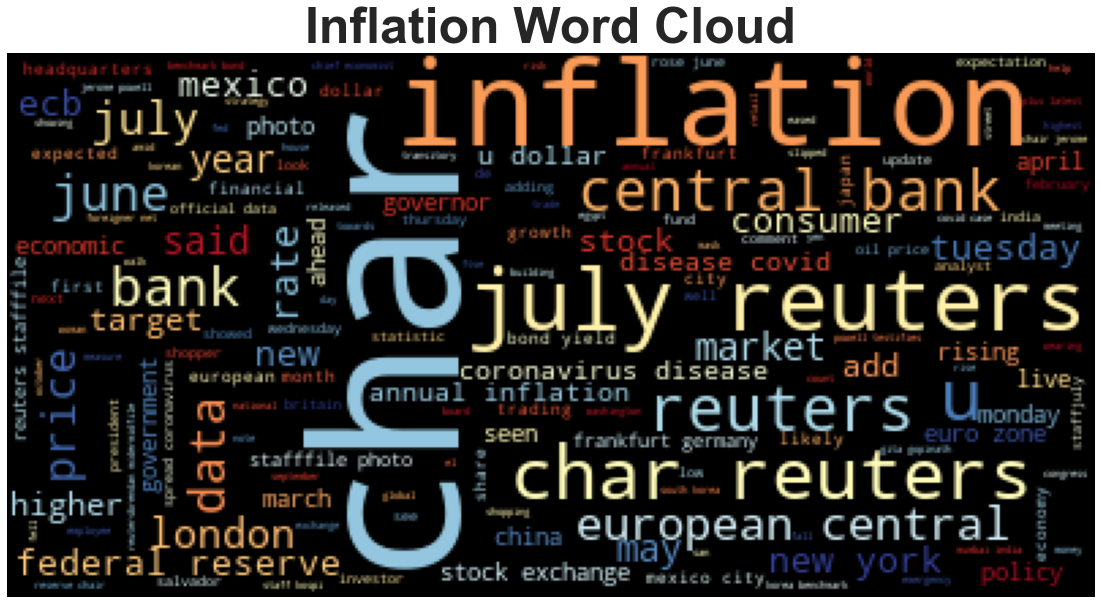

In [52]:
# Generate the Bitcoin word cloud
wordcloud = WordCloud(colormap="RdYlBu").generate(" ".join(inflation_tokens))
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 50, "fontweight": "bold"}
plt.title("Inflation Word Cloud", fontdict=fontdict)
plt.show()

# Earnings Call NLP 

In [53]:
 # Initial imports
import os
from pathlib import Path
import pandas as pd
import datetime 
from newsapi import NewsApiClient
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from dotenv import load_dotenv
load_dotenv()

True

In [54]:
 from nltk.corpus import reuters, stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

# Code to download corpora
import nltk
nltk.download('stopwords')
nltk.download('reuters')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/georgem/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package reuters to /Users/georgem/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to /Users/georgem/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [55]:
with open("HD 2020 Q1.txt") as a:
    HD_2020_Q1= a.read()

with open("HD 2020 Q2.txt") as a:
    HD_2020_Q2= a.read()

with open("HD 2020 Q3.txt") as a:
    HD_2020_Q3= a.read()

with open("HD 2020 Q4.txt") as a:
    HD_2020_Q4= a.read()

with open("HD 2021 Q1.txt") as a:
    HD_2021_Q1= a.read()

In [56]:
# Download/Update the VADER Lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/georgem/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [81]:
HD_2020_Q1_sentiment = analyzer.polarity_scores(HD_2020_Q1)
HD_2020_Q2_sentiment = analyzer.polarity_scores(HD_2020_Q2)
HD_2020_Q3_sentiment = analyzer.polarity_scores(HD_2020_Q3)
HD_2020_Q4_sentiment = analyzer.polarity_scores(HD_2020_Q4)
HD_2021_Q1_sentiment = analyzer.polarity_scores(HD_2021_Q1)

In [82]:
print("Overall sentiment dictionary is")
print("HD 2020 Q1 ", HD_2020_Q1_sentiment['neg'], "Negative", HD_2020_Q1_sentiment['neu'], "Neutral", HD_2020_Q1_sentiment['pos'], "Positive")
print("HD 2020 Q2 ", HD_2020_Q2_sentiment['neg'], "Negative", HD_2020_Q2_sentiment['neu'], "Neutral", HD_2020_Q2_sentiment['pos'], "Positive")
print("HD 2020 Q3 ", HD_2020_Q3_sentiment['neg'], "Negative", HD_2020_Q3_sentiment['neu'], "Neutral", HD_2020_Q3_sentiment['pos'], "Positive")
print("HD 2020 Q4 ", HD_2020_Q1_sentiment['neg'], "Negative", HD_2020_Q4_sentiment['neu'], "Neutral", HD_2020_Q4_sentiment['pos'], "Positive")
print("HD 2021 Q1 ", HD_2021_Q1_sentiment['neg'], "Negative", HD_2021_Q1_sentiment['neu'], "Neutral", HD_2021_Q1_sentiment['pos'], "Positive")

Overall sentiment dictionary is
HD 2020 Q1  0.037 Negative 0.815 Neutral 0.147 Positive
HD 2020 Q2  0.02 Negative 0.813 Neutral 0.167 Positive
HD 2020 Q3  0.022 Negative 0.828 Neutral 0.151 Positive
HD 2020 Q4  0.037 Negative 0.813 Neutral 0.159 Positive
HD 2021 Q1  0.026 Negative 0.816 Neutral 0.157 Positive


In [83]:
data = [{'date': '5/19/20', 'quarter': 1, 'positive' :HD_2020_Q1_sentiment['pos'], 'negative': HD_2020_Q1_sentiment['neg'], 'neutral' : HD_2020_Q1_sentiment['neu']},
        {'date': '8/18/20', 'quarter': 2, 'positive': HD_2020_Q2_sentiment['pos'], 'negative':HD_2020_Q2_sentiment['neg'],'neutral' : HD_2020_Q2_sentiment['neu']}, 
        {'date': '11/17/20', 'quarter': 3,'positive': HD_2020_Q3_sentiment['pos'], 'negative': HD_2020_Q3_sentiment['neg'], 'neutral': HD_2020_Q3_sentiment['neu']},
        {'date': '02/23/21', 'quarter': 4,'positive': HD_2020_Q4_sentiment['pos'], 'negative': HD_2020_Q4_sentiment['neg'], 'neutral': HD_2020_Q2_sentiment['neu']},
        {'date': '5/18/21', 'quarter': 1, 'positive': HD_2021_Q1_sentiment['pos'], 'negative': HD_2021_Q1_sentiment['neg'], 'neutral': HD_2021_Q1_sentiment['neu']}]
df = pd.DataFrame(data)

In [84]:
# df = df.set_index('date')
df.head()

,date,quarter,positive,negative,neutral
0,5/19/20,1,0.147,0.037,0.815
1,8/18/20,2,0.167,0.020,0.813
2,11/17/20,3,0.151,0.022,0.828
3,02/23/21,4,0.159,0.029,0.813
4,5/18/21,1,0.157,0.026,0.816


In [86]:
df2 = df.drop(columns=["quarter", 'neutral']).set_index('date')
df2 = df2.pct_change().dropna()
df2

,positive,negative
date,,
8/18/20,0.136054,-0.459459
11/17/20,-0.095808,0.100000
02/23/21,0.052980,0.318182
5/18/21,-0.012579,-0.103448


In [338]:
# Load .env enviroment variables
load_dotenv()

# Set News API Key
newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [91]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp("2020-08-15", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-23", tz="America/New_York").isoformat()

# Set the stock tickers
tickers = ['HD']

# Get 1 year's worth of historical data for all stocks
df = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df.tail()

HD                                     
                             open      high       low   close   volume
time                                                                  
2021-05-17 00:00:00-04:00  321.49  322.8300  315.3100  320.25  3994939
2021-05-18 00:00:00-04:00  321.00  324.5550  314.7783  316.77  5984172
2021-05-19 00:00:00-04:00  312.35  314.7500  309.0660  314.53  4536794
2021-05-20 00:00:00-04:00  314.89  319.7100  314.8900  315.99  2986685
2021-05-21 00:00:00-04:00  317.05  319.2837  314.4500  315.83  3168200

In [92]:
 # Drop Outer Table Level
df = df.droplevel(axis=1, level=0)

# Use the drop function to drop extra columns
df = df.drop(columns=["open", "high", "low", "volume"])
# df.columns = ['HD', 'LOW', 'KR', 'WMT', 'CAT','SPY']
# Since this is daily data, we can keep only the date (remove the time) component of the data
df.index = df.index.date

# Display sample data
df.head()

,close
2020-08-17,288.650
2020-08-18,285.000
2020-08-19,282.880
2020-08-20,280.680
2020-08-21,283.215


In [93]:
df.columns = ['HD']

<AxesSubplot:>

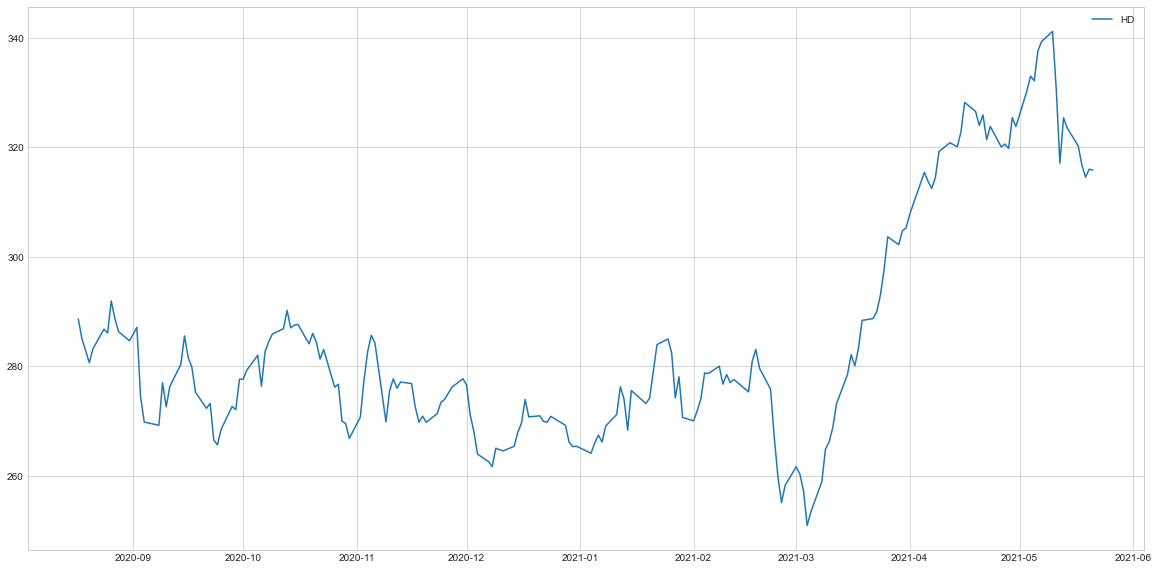

In [94]:
df.plot()

<AxesSubplot:xlabel='date'>

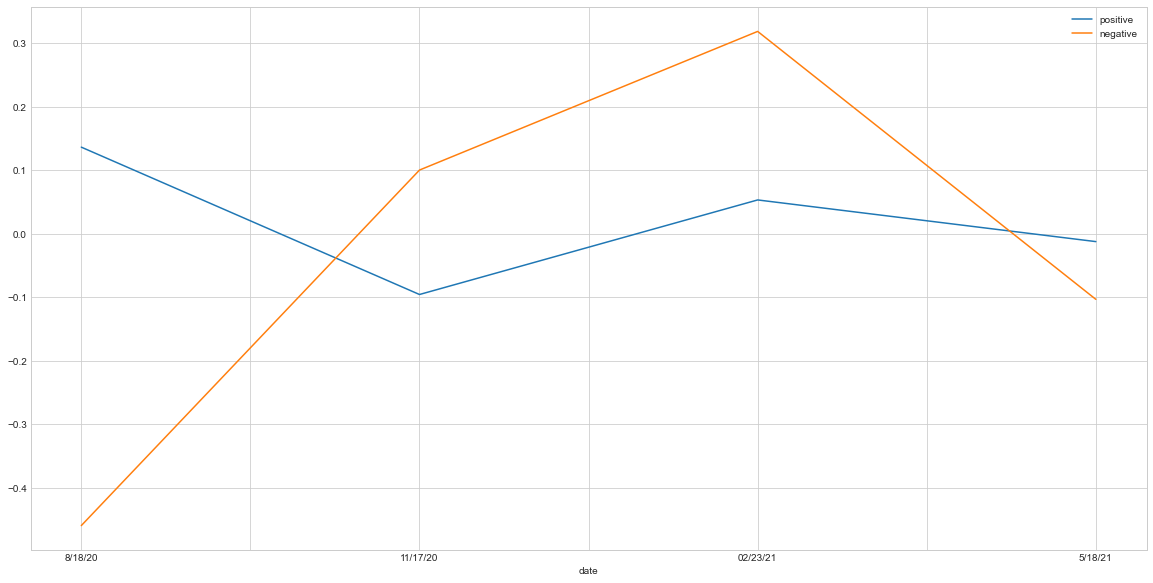

In [95]:
df2.plot()

In [96]:
hd_pct_change = df.pct_change().dropna()

<AxesSubplot:>

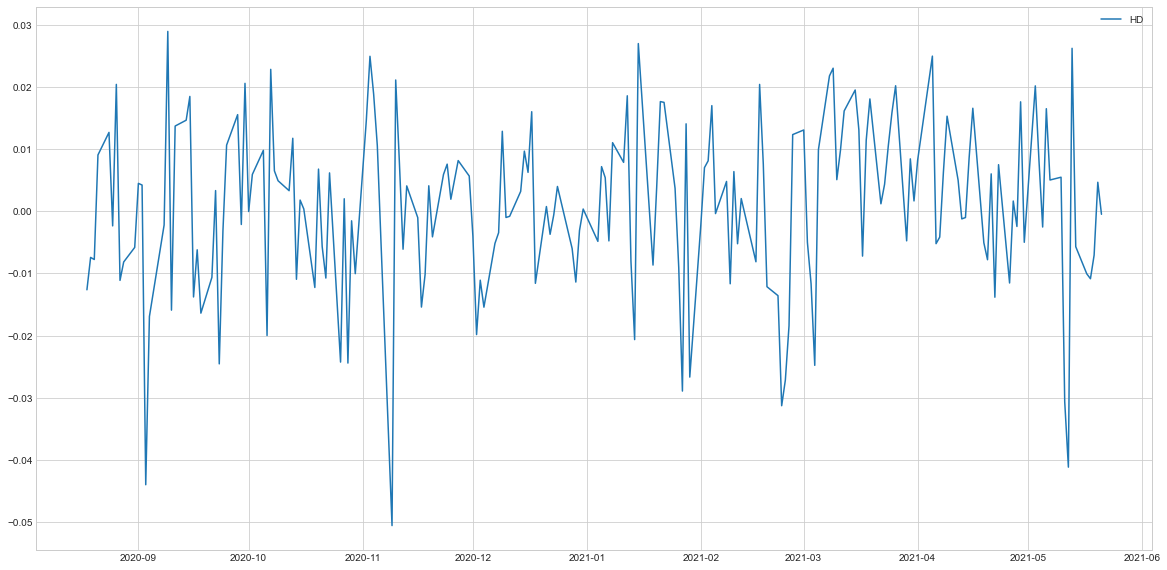

In [97]:
hd_pct_change.plot()